In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Kaggle-ColombusRetailClassification\data\train.csv", index_col=0)

In [3]:
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    # Class constructor method that takes in a list of values as its argument
    def __init__(self):
        self.minority_traffic_types = [7, 9, 12, 14, 15, 16, 17, 18, 19]
        self.minority_browser_types = [3, 7, 9, 11, 12, 13]

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    # Transformer method we wrote for this transformer
    def transform(self, X, y=None):

        # Convert minority operating systems to one "Other" category
        X.loc[:, 'OperatingSystems'] = X['OperatingSystems'].apply(lambda x: x if x < 4 else -1)
        # Convert minority traffic types to one "Other" category
        X.loc[:, 'TrafficType'] = X['TrafficType'].apply(lambda x: x if x not in self.minority_traffic_types else -1)
        # Convert minority browser types to one "Other" category
        X.loc[:, 'Browser'] = X['Browser'].apply(lambda x: x if x not in self.minority_browser_types else -1)

        return X

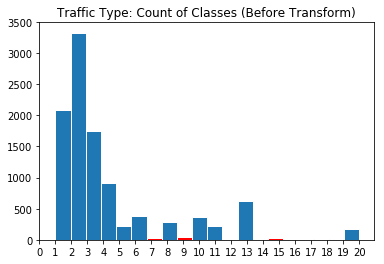

In [4]:
fig, ax = plt.subplots()
data = df['TrafficType'].values.ravel()

N, bins, patches = ax.hist(data, edgecolor='white', linewidth=1, bins=20)
mtt = [7, 9, 12, 14, 15, 16, 17, 18, 19]
for i in mtt:
    patches[i-1].set_facecolor('r')
ax.set_xticks([int(x) for x in range(0,21)]);
ax.set_title("Traffic Type: Count of Classes (Before Transform)");

In [5]:
transformer = CategoricalTransformer()
df2 = transformer.fit_transform(df)

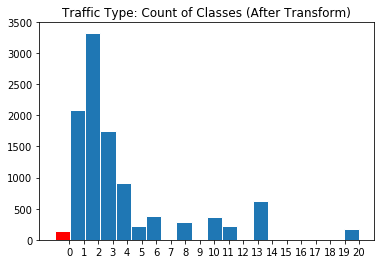

In [6]:
fig, ax = plt.subplots()
data = df2['TrafficType'].values.ravel()

N, bins, patches = ax.hist(data, edgecolor='white', linewidth=1, bins=20)

for i in range(0,1):
    patches[i].set_facecolor('r')
ax.set_xticks([int(x) for x in range(0,21)]);
ax.set_title("Traffic Type: Count of Classes (After Transform)");
plt.show()